# ROY Award Prediction

## Data Preprocessing

import general preprocessed data

In [1]:
%run Preprocessing_main.ipynb

In [43]:
MSE_list = []
model_list = ['linear_reg, SVR, tree, forest, network']

In [44]:
ROY_data['G_x'] = ROY_data['G_x'].astype(int)

Dropping redundant columns

In [45]:
def drop_col(data):
    corr = data.corr()
    NEW_data = data
    del_list = []
    del_col = []
    for i in corr:
        for ind in corr[(corr[i]>0.9)&(corr[i]<1)].index:
            if ind not in del_list:
                try:
                    NEW_data = NEW_data.drop(ind, axis = 1)
                    del_col.append(ind)
                except:
                    continue
        del_list.append(i)
    NEW_data = NEW_data.drop('Player', axis = 1)
    return NEW_data, del_col

In [46]:
NEW_data, del_list = drop_col(ROY_data)

## Standardize for analysis

In [47]:
# standardize through years
def std_scale_split(data, year_names):
    scaler = StandardScaler()
    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year_y']==i]
        data_year = data_year.drop(columns='year_y')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

X_train, X_test, y_train, y_test = std_scale_split(NEW_data, year_names)

## Model Implementation

### Model 1 : Linear Regression

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
regressionSummary(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)
comp = pd.DataFrame({0: y_test[0], 1: y_pred.reshape(len(y_pred))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_lin = y_pred_sorted
MSE_list.append(lin_mse)


Regression statistics

                      Mean Error (ME) : -0.1579
       Root Mean Squared Error (RMSE) : 0.3682
            Mean Absolute Error (MAE) : 0.2670
          Mean Percentage Error (MPE) : 617.7091
Mean Absolute Percentage Error (MAPE) : 2671.5664


In [7]:
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
lin_cor = cor[1, 0]

### Model 2 : Support Vector Regression

In [49]:
regressor = SVR()
regressor.fit(X = X_train, y = y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
regressionSummary(y_train, y_train_pred)
regressionSummary(y_test, y_pred)
SVR_mse = mean_squared_error(y_test, y_pred)
comp = pd.DataFrame({0: y_test[0], 1: y_pred.reshape(len(y_pred))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_SVR = y_pred_sorted
MSE_list.append(SVR_mse)


Regression statistics

                      Mean Error (ME) : -0.0134
       Root Mean Squared Error (RMSE) : 0.0837
            Mean Absolute Error (MAE) : 0.0766
          Mean Percentage Error (MPE) : -493.5140
Mean Absolute Percentage Error (MAPE) : 887.8571

Regression statistics

                      Mean Error (ME) : -0.1403
       Root Mean Squared Error (RMSE) : 0.2124
            Mean Absolute Error (MAE) : 0.1759
          Mean Percentage Error (MPE) : -2440.4389
Mean Absolute Percentage Error (MAPE) : 2577.9727


In [50]:
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
SVR_cor = cor[1, 0]

### Model 3 : Decision Tree Regression

In [51]:
fin_alpha = 0
tree_mse = 1E20
fin_cor = -1
for alpha in np.linspace(0, 0.5, 21):
    regressor = DecisionTreeRegressor(ccp_alpha = alpha, random_state = 1)
    regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    MSE = mean_squared_error(y_test, y_pred)
    cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
    if cor[1, 0] > fin_cor:
        fin_alpha = alpha
        fin_cor = cor[1, 0]
        y_pred_tree = y_pred
        tree_mse = MSE
print('alpha: {:1.4f}, CORR: {:1.4f}'.format(fin_alpha, fin_cor))
tree_cor = fin_cor
comp = pd.DataFrame({0: y_test[0], 1: y_pred_tree.reshape(len(y_pred_tree))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_tree = y_pred_sorted
MSE_list.append(tree_mse)

alpha: 0.0250, CORR: 0.5420


In [12]:
regressor = DecisionTreeRegressor(ccp_alpha = 0.025, random_state = 1)
regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
y_pred = regressor.predict(X_test)
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0845
       Root Mean Squared Error (RMSE) : 0.2592
            Mean Absolute Error (MAE) : 0.1657
          Mean Percentage Error (MPE) : -970.0307
Mean Absolute Percentage Error (MAPE) : 1005.6109


### Model 4 : Random Forest Regression

In [13]:
min_mse = 1E20
fin_alpha = 0
fin_NE = 0
fin_cor = -1

for alpha in np.linspace(0, 0.5, 11):
    for n_e  in np.linspace(10, 100, 10):
        regressor = RandomForestRegressor(n_estimators = int(n_e), ccp_alpha = alpha, random_state = 1)
        regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
        y_pred = regressor.predict(X_test)
        y_train_pred = regressor.predict(X_train)
        MSE = mean_squared_error(y_test, y_pred)
        cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
        if cor[1, 0] > fin_cor:
            fin_alpha = alpha
            fin_cor = cor[1, 0]
            y_pred_for = y_pred
            fin_NE = n_e
print('alpha: {:1.4f}, CORR: {:1.4f}'.format(fin_alpha, fin_cor))
for_cor = fin_cor
comp = pd.DataFrame({0: y_test[0], 1: y_pred_for.reshape(len(y_pred_for))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_for = y_pred_sorted

alpha: 0.0000, CORR: 0.6237


In [14]:
fin_NE

10.0

In [15]:
regressor = RandomForestRegressor(n_estimators = 10, ccp_alpha = 0, random_state = 1)
regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
y_pred = regressor.predict(X_test)
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.1238
       Root Mean Squared Error (RMSE) : 0.2408
            Mean Absolute Error (MAE) : 0.1539
          Mean Percentage Error (MPE) : -1641.0221
Mean Absolute Percentage Error (MAPE) : 1655.8045


### Model 5 : Neural Network

Scaling data into [0, 1] for neural network

In [31]:
# standardize through years
def nor_scale_split(data, year_names):
    scaler = MinMaxScaler()

    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year_y']==i]
        data_year = data_year.drop(columns='year_y')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

X_train, X_test, y_train, y_test = nor_scale_split(NEW_data, year_names)

In [32]:
best_cor = 0
best_bat = [0, 0]
best_size = [0, 0]
for size1 in [int(i) for i in np.linspace(5, 20, 16)]:
    for bat in [int(i) for i in np.linspace(5, 100, 20)]:
        NNRegressor = MLPRegressor(hidden_layer_sizes = (size1), batch_size = bat, 
                                   activation = 'logistic', random_state= 1)
        NNRegressor.fit(X_train, y_train)
        y_pred = NNRegressor.predict(X_test)
        NN_cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
        NN_cor = NN_cor[1, 0]
        if NN_cor > best_cor:
            best_cor = NN_cor
            best_size[0] = size1
            best_bat[0] = bat
            y_pred_NN = y_pred
print('layer size: {:1.4f}, batch size: {:1.4f}, CORR: {:1.4f}'.format(best_size[0], best_bat[0], best_cor))
NN_cor = best_cor
comp = pd.DataFrame({0: y_test[0], 1: y_pred_NN.reshape(len(y_pred_NN))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_NN = y_pred_sorted

layer size: 9.0000, batch size: 5.0000, CORR: 0.7079


In [33]:
regressionSummary(y_test, y_pred_NN)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.2497
            Mean Absolute Error (MAE) : 0.1701
          Mean Percentage Error (MPE) : -1089.4737
Mean Absolute Percentage Error (MAPE) : 1154.5943


### Model Comparison Using Correlation Coefficient and Lift Chart

In [18]:
print('Linear regression: {:1.4f}'.format(lin_cor))
print('SVR: {:1.4f}'.format(SVR_cor))
print('Decision tree: {:1.4f}'.format(tree_cor))
print('Random forest: {:1.4f}'.format(for_cor))
print('Neural Network: {:1.4f}'.format(NN_cor))

Linear regression: 0.6848
SVR: 0.5406
Decision tree: 0.5420
Random forest: 0.6237
Neural Network: 0.7079


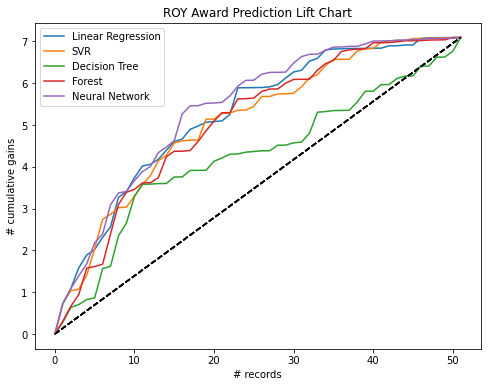

In [19]:
ax = gainsChart(pd.Series(y_pred_lin), label = 'Linear Regression',figsize = [8, 6], color = 'C0')
ax = gainsChart(pd.Series(y_pred_SVR), label = 'SVR', ax = ax, color = 'C1')
ax = gainsChart(pd.Series(y_pred_tree), label = 'Decision Tree', ax = ax, color = 'C2')
ax = gainsChart(pd.Series(y_pred_for), label = 'Forest', ax = ax, color = 'C3')
ax = gainsChart(pd.Series(y_pred_NN), label = 'Neural Network', ax = ax, color = 'C4')
plt.title('ROY Award Prediction Lift Chart')
plt.legend()

plt.show()

# Evaluation

## Linear Regression

### Summary

In [20]:
# preprocessing
X_train, X_test, y_train, y_test = std_scale_split(NEW_data, year_names)

# build model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# model summary
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print('Model: linear regression\n')
regressionSummary(y_test, y_pred)

# evaluations
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
lin_cor = cor[1, 0]

lin_R2 = r2_score(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))

lin_RMSE = mean_squared_error(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))**0.5
print('\nCORR: {:1.4f}'.format(lin_cor))
print('RMSE: {:1.4f}'.format(lin_RMSE))

Model: linear regression


Regression statistics

                      Mean Error (ME) : -0.1579
       Root Mean Squared Error (RMSE) : 0.3682
            Mean Absolute Error (MAE) : 0.2670
          Mean Percentage Error (MPE) : 617.7091
Mean Absolute Percentage Error (MAPE) : 2671.5664

CORR: 0.6848
RMSE: 0.3682


### Visualization

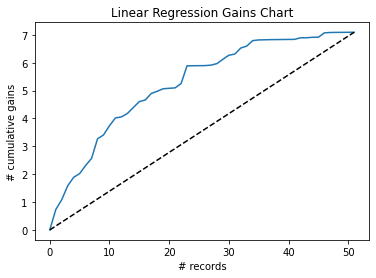

In [21]:
ax = gainsChart(pd.Series(y_pred_lin), label = 'Linear regression')
plt.title('Linear Regression Gains Chart')
plt.show()

## Neural network

In [22]:
# preprocessing
X_train, X_test, y_train, y_test = nor_scale_split(NEW_data, year_names)

# build model
NN = MLPRegressor(hidden_layer_sizes = (9), batch_size = 5, 
                                   activation = 'logistic', random_state= 1)
NN.fit(X_train, y_train)

# model summary
y_pred = NN.predict(X_test)
y_train_pred = NN.predict(X_train)

print('Model: Neural network\n')
regressionSummary(y_test, y_pred)

# evaluations
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
NN_cor = cor[1, 0]

NN_R2 = r2_score(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))

NN_RMSE = mean_squared_error(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))**0.5
print('\nCORR: {:1.4f}'.format(NN_cor))
print('RMSE: {:1.4f}'.format(NN_RMSE))

Model: Neural network


Regression statistics

                      Mean Error (ME) : -0.0809
       Root Mean Squared Error (RMSE) : 0.2553
            Mean Absolute Error (MAE) : 0.2039
          Mean Percentage Error (MPE) : 500.3101
Mean Absolute Percentage Error (MAPE) : 2384.5382

CORR: 0.7079
RMSE: 0.2553


### Visualization

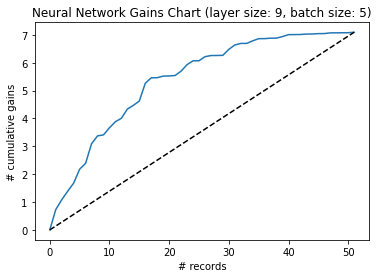

In [23]:
ax = gainsChart(pd.Series(y_pred_NN), label = 'Neural Network')
plt.title('Neural Network Gains Chart (layer size: 9, batch size: 5)')
plt.show()

# Prediction

In [24]:
data_2022 = rook_ref.loc[rook_ref['Player'].isin(rook_2022['Player'].array)]

data_2022['G_x'] = data_2022['G_x'].astype(int)
NEW_2022 = data_2022.drop(del_list, axis = 1)
NEW_2022 = NEW_2022.drop('Rk', axis = 1)
player_list = NEW_2022['Player']
NEW_2022 = NEW_2022.drop('Player', axis = 1)

In [25]:
scaler = StandardScaler()
scaled_2022 = scaler.fit_transform(NEW_2022)
pred_22_lin = regressor.predict(scaled_2022)

In [26]:
scaler = MinMaxScaler()
scaled_2022 = scaler.fit_transform(NEW_2022)
pred_22_NN = NN.predict(scaled_2022)

In [27]:
NEW_2022['Player'] = player_list
NEW_2022['share_NN'] = pred_22_NN
NEW_2022['share_lin'] = pred_22_lin

#### Neural Network prediction

In [28]:
NEW_2022.sort_values('share_NN', ascending=False).head(5)[['Player', 'share_NN']]

,Player,share_NN
63,Scottie Barnes\barnesc01,0.786559
936,Evan Mobley\mobleev01,0.759317
1379,Franz Wagner\wagnefr01,0.574277
727,Herbert Jones\joneshe01,0.499805
251,Cade Cunningham\cunnica01,0.463623


#### Linear Regression Prediction

In [29]:
NEW_2022.sort_values('share_lin', ascending=False).head(5)[['Player', 'share_lin']]

,Player,share_lin
63,Scottie Barnes\barnesc01,2.664779
936,Evan Mobley\mobleev01,2.084736
1379,Franz Wagner\wagnefr01,1.802425
727,Herbert Jones\joneshe01,1.486778
631,Bones Hyland\hylanbo01,1.070102
